### import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

age: Umur satuannya tahun. 
sex: jenis kelamin 1 male, 0 female 
cp: chest pain. Ada 4 tipe 1: typical angina 2: atypical angina 3: non-anginal pain 4: asymptomatic  
trestbps: Tekanan darah (kondisi resting) [mmHg]  
chol: serum cholestoral [mg/dl]  
fbs: kadar gula (kondisi berpuasa) 1 artinya > 120 mg/dl 0 sebaliknya 
restecg: electrocardiographic (kondisi resting) 0: normal 1: ada ST-T wave abnormality 2: ada indikasi left ventricular hypertrophy menurut kriteria Estes
thalach: detak jantung maximum 
exang: mengalami chest pain tipe angina ketika olahraga 1 artinya iya 0 artinya tidak 
oldpeak: mengalami ST depression ketika olahraga dibandingkan saat diam  
slope: kemiringan pada peak exercise ST segment -> (coba search ST Segment di google) 0: naik 1: datar 2:turun <
ca: banyaknya saluran saluran darah utama (0-3) dilihat dengan flourosopy 
thal: 0 = normal; 1 = cacat permanen; 2 = cacat reversible 
target (condition): 0 tidak ada indikasi, 1 ada indikasi

import data

In [2]:
df=pd.read_csv("penyakit_jantung.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,54,1,3,120,188,0,0,113,0,1.4,1,1,2,1
246,54,1,3,110,239,0,0,126,1,2.8,1,1,2,1
247,54,1,3,110,206,0,2,108,1,0.0,1,1,0,1
248,54,1,3,122,286,0,2,116,1,3.2,1,2,0,1


In [3]:
# data cleaninh
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        250 non-null    int64  
 1   sex        250 non-null    int64  
 2   cp         250 non-null    int64  
 3   trestbps   250 non-null    int64  
 4   chol       250 non-null    int64  
 5   fbs        250 non-null    int64  
 6   restecg    250 non-null    int64  
 7   thalach    250 non-null    int64  
 8   exang      250 non-null    int64  
 9   oldpeak    250 non-null    float64
 10  slope      250 non-null    int64  
 11  ca         250 non-null    int64  
 12  thal       250 non-null    int64  
 13  condition  250 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 27.5 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,56.116000,0.656000,2.000000,132.668000,247.852000,0.156000,0.976000,149.568000,0.296000,1.077600,0.616000,0.716000,0.784000,0.436000
std,8.770074,0.475994,0.973546,18.290104,53.540193,0.363583,0.993667,23.046953,0.457407,1.176433,0.624583,0.941749,0.944942,0.496882
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,1.000000,120.000000,211.250000,0.000000,0.000000,133.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,57.000000,1.000000,2.000000,130.000000,241.500000,0.000000,0.000000,153.500000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,62.000000,1.000000,3.000000,140.000000,276.750000,0.000000,2.000000,165.750000,1.000000,1.750000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


<AxesSubplot:xlabel='cp', ylabel='count'>

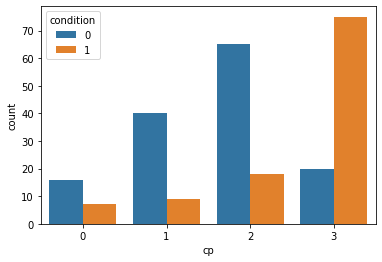

In [5]:
# EDA
# numerik vs kategorik
sns.countplot(x="cp",hue="condition",data=df)

<AxesSubplot:>

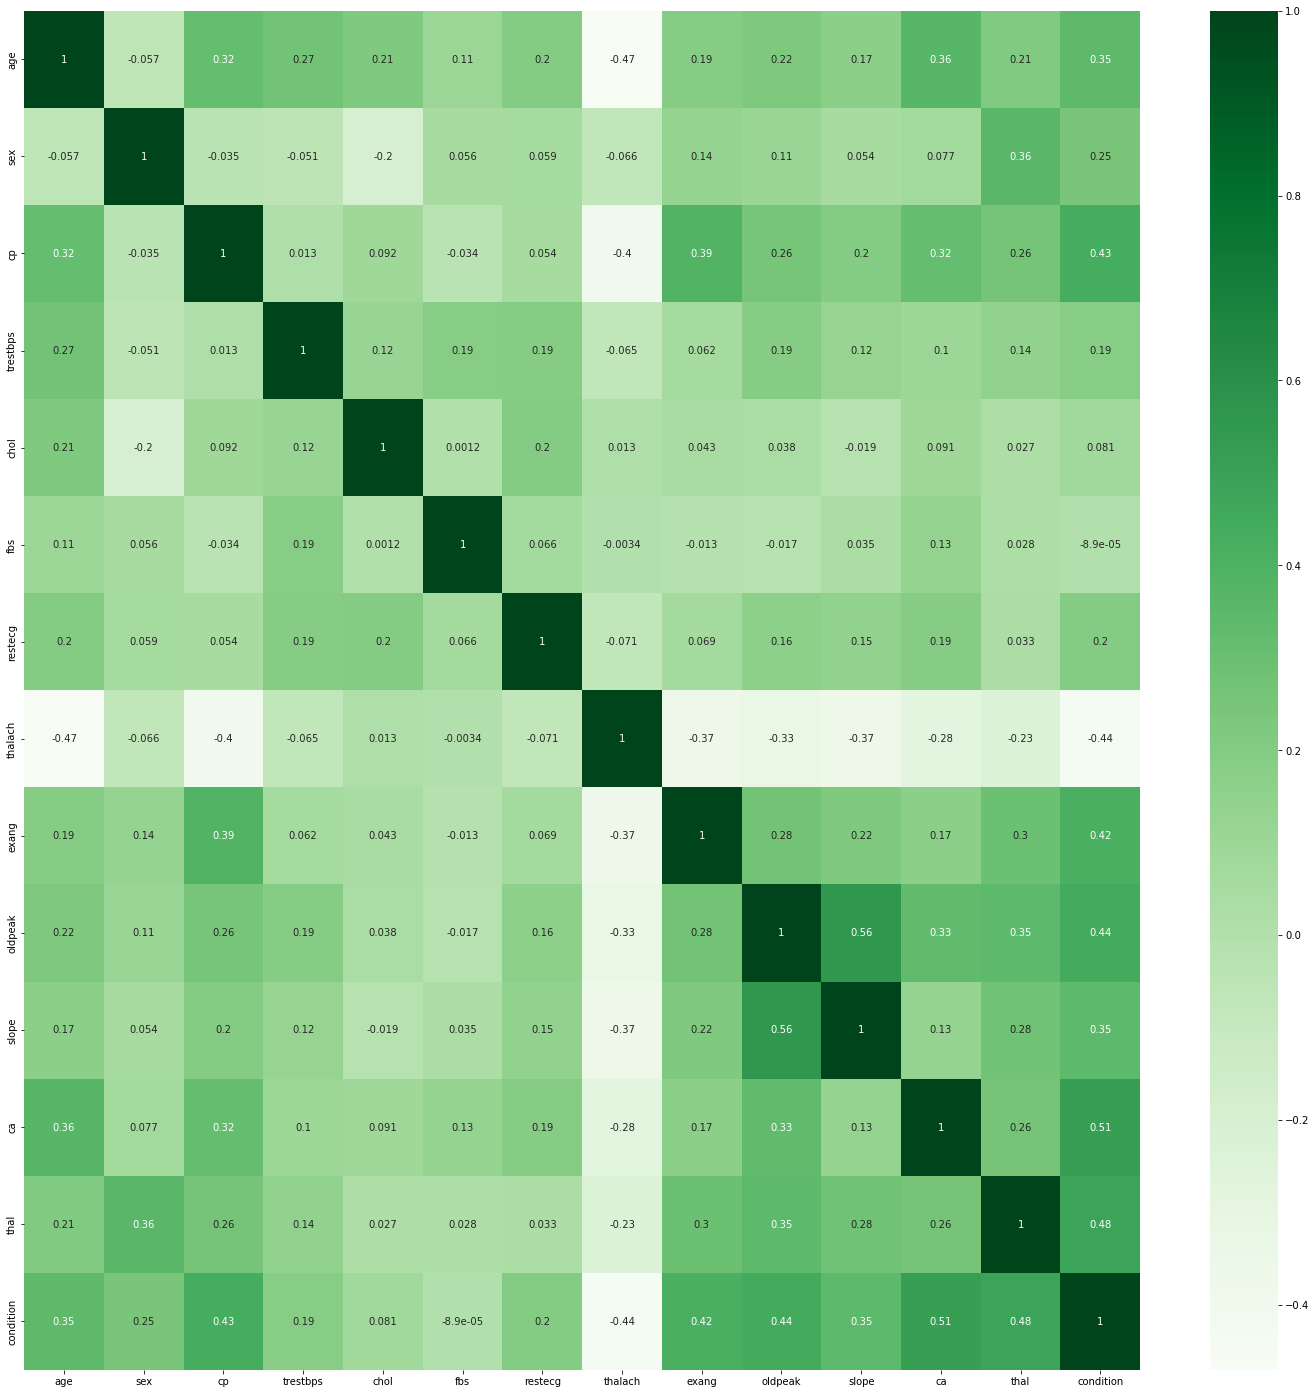

In [6]:
plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(),annot=True, cmap="Greens")


In [7]:
# data processing
from sklearn.model_selection import train_test_split

X=df.drop(columns="condition")
y=df.condition

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((200, 13), (50, 13), (200,), (50,))

In [8]:
# pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler

In [9]:
numerical_pipeline=Pipeline([
    ("imputer",SimpleImputer(strategy='mean')),
    ("scaler",MinMaxScaler())
])
categorical_pipeline=Pipeline([
    ("imputer",SimpleImputer(strategy='most_frequent')),
    ("scaler",OneHotEncoder())
])

In [10]:
from sklearn.compose import ColumnTransformer

In [11]:
preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, [
     'age', 'trestbps', 'chol', 'thalach', 'oldpeak']),
    ("categoric", categorical_pipeline, [
     'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
])


modelling

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
pipeline=Pipeline([
    ('prep',preprocessor),
    ('algo',KNeighborsClassifier(n_neighbors=10,weights='uniform'))
])

In [14]:
knn=pipeline.fit(X_train,y_train)

In [15]:
knn.score(X_train,y_train)


0.88

In [16]:
knn.score(X_test,y_test)

0.8

In [17]:
from sklearn.model_selection import GridSearchCV
parameter = {
    "algo__n_neighbors": range(1, 51, 2),
    "algo__weights": ['uniform', 'distance']
}


In [18]:
knn=GridSearchCV(pipeline,param_grid=parameter,cv=4,n_jobs=1,verbose=1)
knn.fit(X_train,y_train)
print(knn.best_params_)
print(knn.score(X_train,y_train),knn.score(X_test,y_test))

Fitting 4 folds for each of 50 candidates, totalling 200 fits
{'algo__n_neighbors': 19, 'algo__weights': 'uniform'}
0.88 0.82


In [19]:
#test random
soal_test_random=pd.DataFrame({'age':[45],
                              'sex':[1],
                               'cp':[2],
                               'trestbps':[130],
                               'chol':[200],
                               'fbs':[1],
                               'restecg':[1],
                               'thalach':[100],
                               'exang':[1],
                               'slope':[0],
                               'ca':[1],
                               'thal':[1],
                               'oldpeak':[2]
                              })
soal_test_random

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,oldpeak
0,45,1,2,130,200,1,1,100,1,0,1,1,2


In [20]:
prediksi = knn.predict(soal_test_random)
print(prediksi)


[1]


In [21]:
# metrics Classification
df_test=pd.read_csv("test_penyakit_jantung.csv")

In [22]:
df_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,53,1,3,140,203,1,2,155,1,3.1,2,0,2,1
1,53,0,3,130,264,0,2,143,0,0.4,1,0,0,0
2,53,1,3,123,282,0,0,95,1,2.0,1,2,2,1
3,53,0,3,138,234,0,2,160,0,0.0,0,0,0,0
4,53,1,3,142,226,0,2,111,1,0.0,0,0,2,0
5,52,1,3,128,255,0,0,161,1,0.0,0,1,2,1
6,52,1,3,108,233,1,0,147,0,0.1,0,3,2,0
7,52,1,3,112,230,0,0,160,0,0.0,0,1,0,1
8,52,1,3,125,212,0,0,168,0,1.0,0,2,2,1
9,51,0,3,130,305,0,0,142,1,1.2,1,0,2,1


In [23]:
X_test = df_test.drop(columns="condition")
y_test = df_test.condition

In [24]:
y_test

0     1
1     0
2     1
3     0
4     0
5     1
6     0
7     1
8     1
9     1
10    1
11    0
12    1
13    1
14    1
15    0
16    0
17    1
18    0
19    1
20    1
21    0
22    0
23    1
24    1
25    0
26    0
27    1
28    0
29    1
30    1
31    1
32    1
33    1
34    0
35    0
36    0
37    0
38    1
39    0
40    1
41    1
42    1
43    1
44    1
45    0
46    1
Name: condition, dtype: int64

In [25]:
predicted=knn.predict(X_test)
df_test['predicted']=predicted
df_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition,predicted
0,53,1,3,140,203,1,2,155,1,3.1,2,0,2,1,1
1,53,0,3,130,264,0,2,143,0,0.4,1,0,0,0,0
2,53,1,3,123,282,0,0,95,1,2.0,1,2,2,1,1
3,53,0,3,138,234,0,2,160,0,0.0,0,0,0,0,0
4,53,1,3,142,226,0,2,111,1,0.0,0,0,2,0,1
5,52,1,3,128,255,0,0,161,1,0.0,0,1,2,1,1
6,52,1,3,108,233,1,0,147,0,0.1,0,3,2,0,1
7,52,1,3,112,230,0,0,160,0,0.0,0,1,0,1,0
8,52,1,3,125,212,0,0,168,0,1.0,0,2,2,1,1
9,51,0,3,130,305,0,0,142,1,1.2,1,0,2,1,1


In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion_matrix(df_test['condition'],df_test['predicted'])

array([[15,  4],
       [ 7, 21]], dtype=int64)

Text(33.0, 0.5, 'actual')

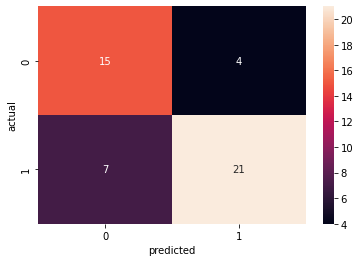

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(df_test['condition'],df_test['predicted'])
ax=plt.subplot()
sns.heatmap(cm,annot=True,fmt='g',ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('actual')

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(df_test['condition'],df_test['predicted'])

0.7659574468085106